# **Introduzione**
Con sistema lineare si intende un insieme di due o più equazioni in due o più incognite, che appaiono con grado 1 nelle equazioni e tutti gli addendi sono di grado 1. Le equazioni sono "a sistema" in quanto, se esiste, lo stesso (o gli stessi) set di valori delle incognite che costituisce (costituiscono) una soluzione per una delle equazioni, è soluzione (sono soluzioni) simultaneamente anche di tutte le altre equazioni.  

**Esempio 1.** Determinazione della quantità di specie in soluzione da una misura spettroscopica
Nel regime di risposta lineare della spettroscopia UV-Vis, lo spettro di una miscela di cromofori (se non troppo concentrati) è la somma degli spettri ciascuno di intensità proporzionale alla quantità della specie. Misurando lo spettro della miscela e conoscendo lo spettro dei singoli composti, impostando  un sistema lineare si può risalire alla concentrazione di tutte le specie.
La linearità deriva dal fatto che l'assorbanza ($A$) è linearmente proporzionale alla concentrazione ($c$) secondo la legge di Lambert-Beer: $A=\epsilon b c$, con $\epsilon$ il coefficiente di estinzione molare (ottenuto dagli spettri degli "standard" - le specie pure a concentrazione nota) e $b$ è il cammino ottico.

**Esempio 2.** Bilanciamento di una reazione chimica
Bilanciare una reazione chimica è un'abilità fondamentale per un chimico. D'altra parte a volte si tratta di un processo tedioso. Leggendo una reazione chimica come un'equazione in cui i coefficienti stechiometrici delle specie chimiche (reagenti e prodotti) sono le incognite, per ogni elemento è possibile costruire un'equazione lineare dal suo bilancio di materia.

**Esempio 3.** Determinazione del numero di precessi stechiometrici indipendenti
Il numero di processi stechiometrici indipendenti è importante quando si devono stabilire i gradi di libertà di un sistema reattivo al fine di saper controllare le condizioni di reazione. Anche questo è un problema di algebra lineare.

**Esempio 4.** Bilanci di materia in flusso
In chimica industriale le reazioni e le trasformazioni, in generale, avvengono (letteralmente, o in senso lato) in flusso: una certa quantità di materia entra nel processo e una certa quantità di materia abbandona il processo. In stato stazionario (ossia in condizioni in cui i flussi non dipendono dal tempo), eseguire i bilanci di materia nel processo richiede la risoluzione di sistemi lineari.

# **Soluzione di un sistema lineare**
Supponiamo di voler risolvere questo problema: una soluzione contiene nicotinammide (N) e acido nicotinico (A). Si misura lo spettro UV-Vis e si nota che a 261 nm l'assorbanza vale 0.920, mentre a 213 nm l'assorbanza vale 0.487. Per la nicotinammide, il coefficiente di estinzione molare alle due lunghezze d'onda vale: $\epsilon_\textrm{N} (261 \mbox{ nm}) = 4695$
M<sup>-1</sup> cm<sup>-1</sup> e $\epsilon_\textrm{N}(213 \mbox{ nm}) = 10$
M<sup>-1</sup> cm<sup>-1</sup>, mentre per l'acido nicotinico:
$\epsilon_\textrm{A}(261 \mbox{ nm}) = 5704$
M<sup>-1</sup> cm<sup>-1</sup> e
$\epsilon_\textrm{A}(213 \mbox{ nm}) = 4992$
M<sup>-1</sup> cm<sup>-1</sup>. Se il cammino ottico $b=1$ cm, qual è la composizione molare della soluzione?

Usando la Lambert-Beer e ammattendo che lo spettro sia la somma degli spettri, allora si può impostare il sistema di equazioni:

\begin{equation}
\left\{
\begin{array}{lllll}
4695\, c_\textrm{N} &+& 5704\, c_\textrm{A} &=& 0.920\\
10\, c_\textrm{N} &+& 4992\, c_\textrm{A} &=& 0.487
\end{array}
\right.
\end{equation}
dove si è tenuto conto che $b=1$ cm e sono state omesse le unità di misura, sapendo che le concetrazioni $c_\textrm{N}$ e $c_\textrm{A}$ sono molari.


La risoluzione per eliminazione è un approccio, in questo caso, semplice che  si può implementare come metodo automatico di calcolo.


Nella cella che segue vengono allocate le variabili che contengono i valori dei coefficienti e dei termini noti:

In [ ]:
# Coefficienti delle equazioni
a11 = 4695
a12 = 5704
a21 = 10
a22 = 4992

# Termini noti
b1 = 0.920
b2 = 0.487

Si implementi nella cella seguente la risoluzione del sistema tramite il metodo dell'eliminazione:

In [ ]:
# Soluzione per eliminazione
r = a11 / a21
cA = (b1 - r * b2) / (a12 - r * a22)
cN = (b1 - a12 * cA) / a11

print (cN, cA)

7.762022890968502e-05 9.740060050298541e-05


Poniamoci, ora, il problema di risolvere un sistema generico di $m$ equazioni in $n$ incognite. Siano $a_{i,j}$ i coefficienti ($i=1,...,m$ e $j=1,...,n$),  $b_i$ i termini noti e $x_j$ le variabili; il sistema è scritto come
\begin{equation}
\left\{
  \begin{array}{l}
  a_{1,1}x_1 + a_{1,2}x_2+\dots+a_{1,j}x_j+\dots+a_{1,n}x_n=b_1\\
  a_{2,1}x_1 + a_{2,2}x_2+\dots+a_{2,j}x_j+\dots+a_{2,n}x_n=b_2\\
  \vdots\\
  a_{i,1}x_1 + a_{i,2}x_2+\dots+a_{i,j}x_j+\dots+a_{i,n}x_n=b_i\\
  \vdots\\
  a_{m,1}x_1 + a_{m,2}x_2+\dots+a_{m,j}x_j+\dots+a_{m,n}x_n=b_m
  \end{array}
\right.
\end{equation}
Un metodo di calcolo deve poter stabilire quante soluzioni esistono (nessuna, una o infinite) e fornire la soluzione, o una particolare soluzione nel caso in cui siano infinite.

Come si determina il numero di soluzioni? Si può ricorrere all'algebra lineare riconoscendo che il sistema può essere riscritto in forma matriciale come
\begin{equation}
\mathbf{A}\mathbf{x} = \mathbf{b}
\end{equation}
dove $\mathbf{A}$ è la matrice $m\times n$

$\mathbf{A}$$=\left[
\begin{array}{cccccc}
a_{1,1} & a_{1,2} & \dots & a_{1,j} & \dots & a_{1,n}\\
a_{2,1} & a_{2,2} & \dots & a_{2,j} & \dots & a_{2,n}\\
\vdots&\vdots&&\vdots&&\vdots\\
a_{i,1} & a_{i,2} & \dots & a_{i,j} & \dots & a_{i,n}\\
\vdots&\vdots&&\vdots&&\vdots\\
a_{m,1} & a_{m,2} & \dots & a_{m,j} & \dots & a_{m,n}
\end{array}
\right]$,

$\mathbf{b}$ la matrice colonna degli $m$ termini noti

$\mathbf{b}$$=\left[
\begin{array}{c}
b_1\\b_2\\\vdots\\b_j\\\vdots\\b_m
\end{array}
\right]$,

e, infine, $\mathbf{x}$ la matrice colonna delle $n$ incognite


$\mathbf{x}$
$=\left[
\begin{array}{c}
x_1\\x_2\\\vdots\\x_i\\\vdots\\x_n
\end{array}
\right]$.



Secondo il teorema di Rouché-Capelli, il sistema ammette soluzioni se e solo se il rango di $\mathbf{A}$ è uguale al rango della matrice associata $(\mathbf{A}|\mathbf{b})$ così costruita:
\begin{equation}
(\mathbf{A}|\mathbf{b})=
\left[
\begin{array}{cccc}
a_{1,1} &  \dots & a_{1,n} & b_{1}\\
\vdots & &\vdots& \vdots\\
a_{m,1} &  \dots & a_{m,n} & b_{m}\\
\end{array}
\right]
\end{equation}
Il rango di una matrice è il numero massimo di righe (o colonne) linearmente indipendenti della matrice. Il rango della matrice $\mathbf{A}$ si indica con $\textrm{rk}(\mathbf{A})$.

Si chiama **omoegeneo** il sistema tale per cui $\mathbf{b}=\mathbf{0}$. In questo caso, banalmente $\textrm{rk}(\mathbf{A})=\textrm{rk}((\mathbf{A}|\mathbf{0}))$ e quindi esiste sempre almeno una soluzione; difatti, $\mathbf{x}=\mathbf{0}$ è la soluzione triviale di un qualsiasi sistema lineare omogeneo.

In generale, quando il sistema ammette soluzioni, si possono riscontrare questi casi:
* $n<m$: il sistema si dice *sovradeterminato* in quanto il numero di incognite ($n$) è minore del numero di equazioni ($m$). Il sistema può avere una o infinite soluzioni;

* $n=m$: ci sono tante incognite quante equazioni; se $\textrm{rk}(\mathbf{A})=\textrm{rk}((\mathbf{A}|\mathbf{b}))=n$ allora la soluzione è unica, mentre se il rango è minore di $n$ ci sono infinite soluzioni;

* $n>m$: il sistema si dice *sottodeterminato* in quanto il numero di incognite ($n$) è maggiore del numero di equazioni ($m$). Il sistema ha infinite soluzioni.


Il caso più comune che si riscontra in problemi chimici è quello in cui $n=m$. Nell'esempio dello spettro UV-Vis, $n=m=2$: due incognite (le concentrazioni delle due specie) e due equazioni (l'applicazione della Lambert-Beer alle due lunghezze d'onda).

Ricapitolando quanto scritto sopra, il sistema ammette soluzione se $\textrm{rk}(\mathbf{A})=\textrm{rk}((\mathbf{A}|\mathbf{b}))$. Sotto tale condizione:

* se $\textrm{rk}(\mathbf{A})=n$ esiste una sola soluzione;

* se $\textrm{rk}(\mathbf{A})<n$ esistono infinite soluzioni.

Nel caso in cui $\textrm{rk}(\mathbf{A})=n$ allora la matrice ha determinante non nullo $\textrm{det}(\mathbf{A})\neq 0$. Questo implica che la matrice sia invertibile, ossia che esista la matrice $\mathbf{A}^{-1}$ tale per cui $\mathbf{A}^{-1}\mathbf{A}=\mathbf{I}$, con $\mathbf{I}$ la matrice identità. Dato che esiste l'inversa di $\mathbf{A}$, allora il sistema si può risolvere tramite il calcolo
\begin{equation}
\mathbf{x}=\mathbf{A}^{-1}\mathbf{b}
\end{equation}

---

**Esercizio.** Si risolva il problema dell'esempio dello spettro UV-Vis utilizzando tale metodo. Si definiscano gli array con il ```numpy```. Il metodo ```numpy.linalg.inv``` esegue l'inversa di una matrice.

In [ ]:
import numpy as np

A = np.array([[a11, a12], [a21, a22]])
b = np.array([b1,b2])
x = np.matmul(np.linalg.inv(A), b)
print (x)

[7.76202289e-05 9.74006005e-05]


---

**Esempio.** Bilanciamento di una reazione chimica

Bilanciare una reazione chimica significa assicurare che il numero di atomi di ciascun elemento presente tra i reagenti corrisponda al numero di atomi dello stesso elemento nei prodotti. Le incognite sono i coefficienti stechiometrici delle specie chimiche che fanno parte della reazione. Per ogni elemento chimico che possa, o meno, far parte di tali specie è possibile scrivere una equazione omogenea, che a parole è stata espressa proprio come definizione di reazione bilanciata.

Prendiamo ad esempio la reazione

\begin{equation}
x_1\textrm{H}_2+x_2\textrm{O}_2=x_3\textrm{H}_2\textrm{O}
\end{equation}

Ci sono 3 specie chimice (idrogeno molecolare, ossigeno molecolare, acqua) per cui ci saranno 3 incognite, ossia i loro coefficienti stechiometrici ($x_1,x_2,x_3$). Ci sono 2 specie elementari (idrogeno e ossigeno), per le quali devono valere i bilanci di materia:

\begin{equation}
\left\{
\begin{array}{rrrrrrr}
2x_1&+&0x_2&+&2x_3&=&0\\
0x_1&+&2x_2&+&x_3&=&0
\end{array}
\right.
\end{equation}
La prima equazione è per H, la seconda per O.

Si nota subito una cosa: nel bilanciamento di reazioni chimiche non è detto a priori che il numero di equazioni e il numero di incognite combacino. In questo caso ci sono 3 incognite, ma solo 2 equazioni, quindi il sistema è sottodeterminato. Questo implica già che se la reazione può essere bilanciata (cioè, si può risolvere il sistema), allora le soluzioni sono infinite.

*Perché infinite soluzioni?* Ci sono infinite terne di coefficienti stechiometrici che bilanciano la reazione, e sono tutte una multipla o sottomultipla dell'altra.

Il rango della matrice associata è 2, che corrisponde al numero di variabili meno 1. È questo che implica che le infinite soluzioni siano tutte multplipe l'una dell'altra.

Si può rendere ben definito il sistema scegliendo arbitrariamente il valore di una delle variabili, ad esempio $x_1=-1$. In questo caso, il sistema da risolvere diventa:

\begin{equation}
\left\{
\begin{array}{rrrrr}
0x_2&+&2x_3&=&2\\
2x_2&+&x_3&=&0
\end{array}
\right.
\end{equation}

che, ora, ha 2 incognite, con 2 equazioni e il rango della matrice associata, così come quello della matrice dei coefficienti, è pari al numero di incognite.

Fissato $x_1=-1$, quindi si ottiene $x_2=-1/2$ e $x_3=1$.

**Esercizi.** Usare la risoluzione di sistemi lineari per bilanciare le seguenti reazioni:

1. $x_1\textrm{C}_6\textrm{H}_12\textrm{O}_6+x_2\textrm{O}_2=x_3\textrm{CO}_2+x_4\textrm{H}_2\textrm{O}$

2. $x_1\textrm{PCl}_5+x_2\textrm{H}_2\textrm{O}=x_3\textrm{H}_3\textrm{PO}_4+x_4\textrm{HCl}$

# **Eleminiazione di Gauss - Jordan**
Si può risolvere in modo più "automatico" il problema del bilanciamento della reazione chimica? Un metodo storico è il metodo di eliminazione di Gauss-Jordan. Nella risoluzione di un sistema lineare $\mathbf{A}\mathbf{x}=\mathbf{b}$, consiste in un algoritmo da applicare alla matrice associata $(\mathbf{A}|\mathbf{b})$ in cui si continua a sostituire righe della matrice con combinazioni lineari delle righe stesse (operazione che non modifica la soluzione) fino a ottenere una matrice diagonale superiore, che permete la soluzione iterativa del sistema lineare. Si tratta dell'algoritmo che generalizza quanto è stato fatto nell'esempio iniziale di questo capitolo, sullo spettro UV-Vis.

## **Definizioni**
È utile definire queste matrici.
1. Matrice triangolare superiore: è una matrice tale per cui tutti gli elementi sotto la diagonale sono nulli. Se $\mathbf{A}$ è la matrice, allora $A_{i,j}=0$ se $i>j$.
2. Matrice a scalini (*echelon matrix*): se per ogni riga, il primo elemento non nullo di quella riga è più a destra del primo elemento diverso da zero della riga precedente. Ad esempio:<br>
$\mathbf{A}$$=\left[\begin{array}{rrrrr}
0 & 3 & 0 & -2 & 1\\
0 & 0 & 7 & 0 & 3\\
0 & 0 & 0 & 0 & -9
\end{array}
  \right]$<br>
  è una matrice a scalini. I primi elementi non nulli (nella matrice d'esempio, 3, 7 e -9) di ogni riga si chiamano pivot.


## **Algoritmo di eliminazione di Gauss**
A parole, l'algoritmo di eliminazione di Gauss si può descrivere in questo modo
1. se la prima riga ha il primo elemento nullo, viene scambiata con un'altra riga avente il primo elemento non nullo; per assicurare una maggiore stabilità all'algoritmo, si sceglie quella riga con il primo elemento
non nullo avente il massimo valore assoluto; se tutte le righe hanno il primo elemento nullo, si passa al punto 3;
2. ogni riga $i$ con primo elemento non nullo, eccetto la prima ($i>1$), viene sostituita sommando la prima riga con l'$i$-esima moltiplicata per $-a_{i,1}/a_{1,1}$ in maniera tale che l'$i$-esima riga abbia ora il primo elemento nullo;
3. si ritorna al punto 1, considerando la sottomatrice ottenuta cancellando la prima riga e la prima colonna.

Il risultato sarà una matrice triangolare superiore, che può essere usata per risolvere iterativamente il sistema.

---

**Esercizio.** Risolvere il seguente sistema
\begin{equation}
\left\{
\begin{array}{rrrrr}
-x_1&+4x_2&+x_3&=&1\\
x_1&+x_2&+x_3&=&0\\
2x_1&-x_2&&=&-1
\end{array}
\right.
\end{equation}

In [ ]:
# Funzione che effettua l'eliminazione di Gauss
def gauss_el(A):

  ZERO = 1.0e-10

  n, m = np.shape(A)

  i0 = 0; j0 = 0;

  nscambi = 0; # tiene traccia del numero di scambi

  while (i0 < n and j0 < m):

    # Step 1. controlla se almeno per una riga il primo elemento è non nullo
    notzero = 0
    for i in range (i0, n):
      if (np.abs(A[i,j0]) > ZERO):
        notzero = 1
        break

    if (notzero == 1):
      # Step 1. swap
      eMax = 0.0;
      iswap = -1;

      for i in range (i0 + 1, n):
        if (np.abs(A[i,j0]) > eMax):
          eMax = np.abs(A[i,j0])
          iswap = i

      A[[i0,iswap]] = A[[iswap,i0]]

      if (iswap > -1):
        nscambi = nscambi + 1

      # Step 2. eliminazione
      A0 = A[i0, :]
      for r in range (i0 + 1, n):
        tmp = A[r, :]
        tmp = tmp - A0 * A[r, j0] / A[i0, j0]
        A[r, :] = tmp

    # Step 3. ritorna al punto 1, ma usando la sottomatrice
    i0 = i0 + 1
    j0 = j0 + 1

  return A, nscambi

In [ ]:
# Funzione che effettua l'eliminazione di Gauss - Jordan
def gauss_jordan_el(A):

  ZERO = 1.0e-10

  B, nscambi = gauss_el(A)

  print ('Matrice trasformata tramite eliminazione di Gauss:\n')
  print(B)
  print('\n\n')

  n, m = np.shape(B)

  B[n-1, :] = B[n -1, :] / B[n-1, n-1]

  for r in range (n - 2, -1, -1):
    for r1 in range (n-1, r, -1):
      B[r, :] = B[r, :] - B[r1, :] * B[r, r1] / B[r1, r1]
    B[r, :] = B[r, :] / B[r, r]


  return B, nscambi

In [ ]:
# Risoluzione del sistema

import numpy as np

A = np.array([[-1.0, 4.0, 1.0, 1.0],[1.0, 1.0, 1.0, 0.0],[2.0, -1.0, 0.0, -1.0]])

print ('Matrice associata al sistema:\n')
print (A)
print ('\n\n')

B, s = gauss_jordan_el(A)

print ('Matrice trasformata tramite eliminazione di Gauss - Jordan:\n')
print (B)
print ('\n\n')

print ('Scambi effettuati: ', s)
print ('\n\n')

n, m = np.shape(B)
print('Soluzione (ultima colonna della matrice):\n')
print(B[:, m - 1])


Matrice associata al sistema:

[[-1.  4.  1.  1.]
 [ 1.  1.  1.  0.]
 [ 2. -1.  0. -1.]]



Matrice trasformata tramite eliminazione di Gauss:

[[ 2.         -1.          0.         -1.        ]
 [ 0.          3.5         1.          0.5       ]
 [ 0.          0.          0.57142857  0.28571429]]



Matrice trasformata tramite eliminazione di Gauss - Jordan:

[[ 1.   0.   0.  -0.5]
 [ 0.   1.   0.   0. ]
 [ 0.   0.   1.   0.5]]



Scambi effettuati:  2



Soluzione (ultima colonna della matrice):

[-0.5  0.   0.5]


---

**Esercizi.** Dividersi in 4 gruppi, ogni gruppo risolva uno di questi problemi che si basano sull'utilizzo dell'algoritmo di eliminazione di Gauss o di Gauss - Jordan

1. Data una matrice generica, la sua trasformata secondo l'algoritmo di Gauss permette di determinare il rango della matrice. Implementare un algoritmo che risolva questo problema.
2. Una volta trasformata una matrice quadrata tramite l'eliminazione di Gauss, il prodotto degli elementi sulla diagonale corrisponde, in valore assoluto, al determinante della matrice. Il segno dipende dal numero di scambi: positivo se pari, negativo se dispari. Modificare la funzione '''gauss_el''' affinché restituisca anche il numero di scambi di righe e costruire un algoritmo che calcoli il determinante di una matrice quadrata.
3. Se una matrice quadrata ha determinante non nullo, allora è invertibile. Per ottenere l'inversa di una matrice quadrata $\mathbf{A}$ si applica l'algoritmo di Gauss - Jordan alla matrice $(\mathbf{A}|\mathbf{I})$, con $\mathbf{I}$ la matrice identità che ha le stesse dimensioni di $\mathbf{A}$. Il risultato sarà la matrice completa $(\mathbf{I}|\mathbf{A}^{-1})$.
4. Usare l'algoritmo di eliminazione di Gauss - Jordan per bilanciare la reazione di combustione di un alcano.

# **Matrici di grandi dimensioni**
Il metodo di Gauss - Jordan è molto semplice, ma data una matrice di $n$ righe, le operazioni richieste sono $O(n^3)$. Questo significa che il tempo di calcolo incrementa in maniera cubica con il numero di righe della matrice.

Supponiamo che per fare un'operazione ci vogliano, per essere ottimisti, $10^{-12}$ s. Una matrice con 100 righe viene processata nell'ordine di 1 $\mu$s. Una matrice di 1000 righe richiede 1 ms, per una di $10^4$ righe si passa a 1 s, per una di $10^5$ righe si arriva a 1000 s (circa 15 minuti), mentre per una di $10^6$ righe si arriva a $10^6$ s (11 giorni e mezzo!). Supponendo di dover risolvere 1000 sistemi di questo tipo, in maniera sequenziale, servirebbero 11500 giorni, ossia circa 30 anni! Matrici così grandi sono piuttosto comuni in problemi di chimica computazionale. Esistono approcci maggiormente performanti?

## **Decomposizioni**
Nell'eliminazione di Gauss si cerca direttamente la soluzione al sistema di equazioni lineari (o all'inversione della matrice, o al calcolo del determinante). Se tale operazione va effettuata una sola volta, le operazioni da svolgere sono sempre dell'ordine del cubo delle dimensioni della matrice.

Capita spesso, però, il caso in cui il sistema $\mathbf{Ax}=\mathbf{b}$ debba essere risolto più volte con la medesima $\mathbf{A}$, mentre $\mathbf{b}$ cambia a ogni iterazione. In questo caso potrebbe essere più efficiente poter suddividere la trasformazione della matrice in una forma più "utile" dalla soluzione del problema.

I metodi di decomposizione affrontano con tale filosofia il problema della risoluzione di sistemi lineari. L'idea è quella di svolgere una sola volta l'operazione più dispendiosa in termine di operazioni (la decomposizione della matrice) per poi usare tale trasformazione per reiterare la risoluzione del sistema lineare, che richiede un numero minore di operazioni.

In genere, una volta effettuata la decomposizione, l'algoritmo che risolve il sistema lineare richiede un numero di operazioni dell'ortdine di $O(n^2)$. Nell'esempio di una matrice con $n=10^6$, se un'operazione richiede un tempo di 1 ps, allora per risolvere 1000 sistemi, in maniera sequenziale, sarebbero necessari $10^{-12}\times (10^{6})^2 \times 1000=1000$ s. In altre parole, dopo gli 11.5 giorni per la decomposizione, in circa un quarto d'ora vengono risolti 1000 sistemi (contro i 30 anni stimati sopra!).

Migliorare i metodi di calcolo non ha solo lo scopo di accelerare il calcolo stesso e accedere a sistemi più complessi. Se il calcolo viene affrontato in maniera elettronica, al giorno d'oggi l'ottimizzazione dei metodi di calcolo è rilevante per il risparmio energetico.

### *Decomposizione LU*
In questa decomposizione, la matrice $\mathbf{A}$ viene decomposta nel prodotto di una matrice triangolare inferiore (*lower triangular*, $\mathbf{L}$) e una triangolare superiore (*upper triangular*, $\mathbf{U}$), tale per cui $\mathbf{A}=\mathbf{LU}$.

Una volta ottenuta la decomposizione della matrice, per risolvere il sistema lineare $\mathbf{Ax}=\mathbf{LUx}=\mathbf{b}$ si può procedere risolvendo in sequenza i due sistemi: $\mathbf{Ux}=\mathbf{y}$ e, successivamente, $\mathbf{Ly}=\mathbf{b}$. La risoluzione di sistemi lineari con matrici in cui la sopra (o sotto) diagonale sia nulla richiedono un numero di operazioni dell'ordine $O(n^2)$. Ciò comporta il vantaggio discusso sopra nel caso si debbano risolvere molti sistemi in cui la matrice $\mathbf{A}$ non cambia.

Per migliorare la stabilità dell'algoritmo in genere viene effettuata una decomposizione con *pivoting* parziale, in cui le righe della matrice vengono riarrangiate in modo tale che gli elementi pivot siano numeri relavitamente grandi rispetto agli altri elementi della matrice. Il partizionamento sarà $\mathbf{PA}=\mathbf{LU}$, dove $\mathbf{P}$ è una matrice involutoria (ossia tale per cui $\mathbf{P}^{-1}=\mathbf{P}$) che effettua lo scambio delle righe. La soluzione del sistema lineare si modifica in questo modo: prima si risolve $\mathbf{Ux}=\mathbf{y}$ e, successivamente, $\mathbf{Ly}=\mathbf{P}^{-1}\mathbf{b}=\mathbf{Pb}$

Data la decomposizione LU con *pivoting* parziale, il calcolo del derminante di una matrice quadrata $\mathbf{A}$ di dimensioni $n\times n$ si calcola semplicemente come $\textrm{det}(\mathbf{A})=(-1)^p\prod_{i=1}^nL_{i,i}U_{i,i}$ con $p$ la parità della matrice $\mathbf{P}$, ossia il numero di permutazioni.

Il calcolo dell'inversa di una matrice quadrata $\mathbf{A}$ di dimensioni $n\times n$ si calcola come $\mathbf{A}^{-1}=\mathbf{U}^{-1}\mathbf{L}^{-1}\mathbf{P}$. Il calcolo dell'inversa di una matrice triangolare (inferiore o superiore) è un problema di complessità $O(n^2)$.

### *Decomposizione SVD*
La decomposizione SVD (*singular value decomposition*) è un'operazione tale per cui una matrice generica $\mathbf{A}$ di dimensioni $m\times n$ viene decomposta in

$\mathbf{A}=\mathbf{U}\mathbf{w}\mathbf{V}^\textrm{tr}$

dove $\textrm{tr}$ indica la trasposizione della matrice, $\mathbf{U}$ è una matrice $m\times m$, $\mathbf{V}$ una matrice $n\times n$, e $\mathbf{w}$ una matrice diagonale di dimensioni $m\times n$. Le matrici $\mathbf{U}$ e $\mathbf{V}$ sono unitarie. Quindi, $\mathbf{U}^{-1}=\mathbf{U}^\textrm{tr}$, che comporta che $\mathbf{U}^\textrm{tr}\mathbf{U}=\mathbf{I}$, e relazioni analoghe valgono per $\mathbf{V}$.

In caso di matrici diagonali $n\times n$ la decomposizione SVD rende molto semplice il calcolo dell'inversa della matrice $\mathbf{A}$ (a patto che non sia *singolare*):
$\mathbf{A}^{-1}=\left(\mathbf{Uw}\mathbf{V}^\textrm{tr}\right)^{-1}=\mathbf{V}\mathbf{w}^{-1}\mathbf{U}^\textrm{tr}$,
dove l'inversa di una matrice diagonale è una matrice diagonale i cui elementi sono gli inversi degli elementi della matrice di partenza, ossia $(\mathbf{w}^{-1})_{i,i}=(w_{i,i})^{-1}$.

La risoluzione di un sistema lineare $\mathbf{Ax}=\mathbf{b}$ è, quindi, triviale:
$\mathbf{x}=\mathbf{A}^{-1}\mathbf{b}=\mathbf{V}\mathbf{w}^{-1}\mathbf{U}^\textrm{tr}\mathbf{b}$.

## **Matrici sparse**
Una discussione speciale meritano le matrici sparse. Si tratta di matrici in cui il nummero di elementi nulli è molto maggiore di quello degli elementi diversi da zero (nel caso opposto si parla di matrici *dense*). Si vedrà un esempio di matrice sparsa nel capitolo della soluzione delle equazioni differenziali.

Un vantaggio delle matrici sparse è che, comunemente, il numero di elementi non nulli cresce linearmente con le dimensioni della matrice. Cò comporta che si possano utilizzare algoritmi speciali per la risoluzione di sistemi lineari, più efficienti dei metodi descritti sopra. In genere si tratta di algoritmi iterativi, ossia algoritmi in cui la soluzione si ottiene da una sequenza di operazioni in cui la $k+1$-esima dipende dal risultato della $k$-esima iterazione. In quanto segue si descriverà il metodo del gradiente coniugato (*conjugate gradient*, CG), che è anche particolarmente semplice da implementare.

### *Metodo del gradiente coniugato*
Sia dato il problema di risolvere il sistema $\mathbf{Ax}=\mathbf{b}$ con $\mathbf{A}$ una matrice sparsa di dimensioni $n\times n$. Se la matrice è simmetrica reale e definita semi-positiva (parte reale degli autovalori maggiore o uguale a zero), non singolare e se $\mathbf{b}\neq\mathbf{0}$, allora si può applicare il metodo del gradiente coniugato, (CG - *conjugate gradient*) alla risoluzione del sistema. L'idea è quella di cercare, ricorsivamente, la soluzione ($\mathbf{x}$) minimizzando la funzione $f(\mathbf{x})=\mathbf{x}^\textrm{tr}\mathbf{Ax}/2 - \mathbf{x}^\textrm{tr}\mathbf{b}$. Difatti, minimizzare tale funzione significa trovare lo zero del gradiente della funzione di $f$ rispetto a $\mathbf{x}$, ossia calcolare: $\hat{\nabla}_\mathbf{x}f(\mathbf{x})=\mathbf{Ax}-\mathbf{b}=\mathbf{0}$ che corrisponde a risolvere il sistema.

Partendo da una approssimazione iniziale del sistema lineare, $\mathbf{x}_1$, si costruisce la nuova approssimazione applicando la trasformazione $\mathbf{x}_2=\mathbf{x}_1+\alpha_1\mathbf{p}_1$, dove lo scalare $\alpha_1$ e la direzione $\mathbf{p}_1$ viene costruita dai *residui biconiugati* $\mathbf{r}_1=\mathbf{b}-\mathbf{Ax}_1$ e $\bar{\mathbf{r}}_1=\mathbf{b}-\mathbf{A}^\textrm{tr}\mathbf{x}_1$. Il residuo $\mathbf{r}_k$ mirura quanto la $k$-esima stima della soluzione sia distante dalla soluzione stessa.

Partendo dalla condizione $\mathbf{p}_1=\mathbf{r}_1$ e $\bar{\mathbf{p}}_1=\bar{\mathbf{r}}_1$, il metogo CG si implementa semplicemente come

\begin{equation}
\begin{array}{lll}
\alpha_{k} & = & \displaystyle{\frac{\bar{\mathbf{r}}_k^\textrm{tr}\mathbf{r}_k}{\bar{\mathbf{p}}_k^\textrm{tr}\mathbf{A}\mathbf{p}_k}}\\
\mathbf{r}_{k+1} &=& \mathbf{r}_k-\alpha_k\mathbf{A}\mathbf{p}_k\\
\bar{\mathbf{r}}_{k+1} &=& \bar{\mathbf{r}}_k-\alpha_k\mathbf{A}^\textrm{tr}\bar{\mathbf{p}}_k\\
\mathbf{x}_{k+1}&=&\mathbf{x}_k+\alpha_k\mathbf{p}_k\\
\beta_k&=&\displaystyle{\frac{\bar{\mathbf{r}}_{k+1}^\textrm{tr}\mathbf{r}_{k+1}}{\bar{\mathbf{r}}_k^\textrm{tr}\mathbf{r}_k}}\\
\mathbf{p}_{k+1}&=&\mathbf{p}_k+\beta_k\mathbf{p}_k\\
\bar{\mathbf{p}}_{k+1}&=&\bar{\mathbf{p}}_k+\beta_k\bar{\mathbf{p}}_k
\end{array}
\end{equation}

Se non venissero accumulati errori di calcolo da un'iterazione all'altra, l'algorirmo sopra riportato convergerebbe alla soluzione esatta dopo $n$ iterazioni, se $n$ è la dimensione della matrice $\mathbf{A}$. A causa della propagazione dell'errore, però, non si arriverà a conoscere la soluzione esatta, bensì si otterrà una approssimazione in funzione della tolleranza ammessa per il $k$-esimo residuo. Un esempio di criterio di convergenza potrebbe essere quello di controllare quando il modulo del residuo $|\mathbf{r}_k|$ è minore di una tolleranza scelta come accettabile per la soluzione.


Nella figura che segue si vede il vantaggio di usare il metodo del gradiente coniugato (in cui la ricerca della soluzione segue la spezzata rossa) rispetto al metodo della discesa di gradiente (spezzata bianca).

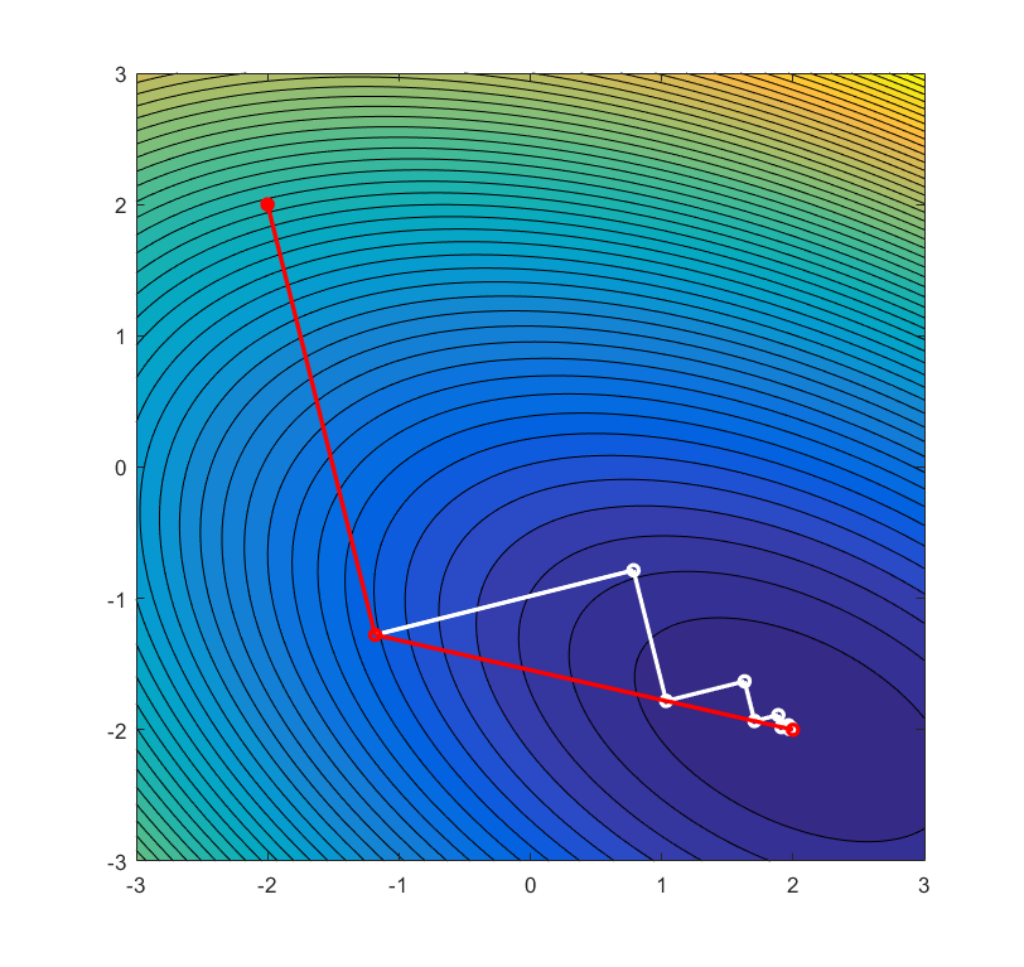

# **Autovalori e Autovettori**
Nella risoluzione di sistemi lineari $\mathbf{Ax}=\mathbf{b}$, quando $\mathbf{A}$ è una matrice quadrata, questa può essere decomposta similmente a come si fa nell'SVD in

\begin{equation}
\mathbf{AV}=\mathbf{V\Lambda}
\end{equation}

dove $\mathbf{V}$ sono gli autovettori (destri) della matrice e $\mathbf{\Lambda}$ una matrice diagonale che raccoglie gli autovalori di $\mathbf{A}$. Similmente al caso SVD, invertire $\mathbf{A}$ per trovare la soluzione richiede, generalmente, che venga calcolata l'inversa di $\mathbf{V}$ e poi si ottiene

\begin{equation}
\mathbf{x}=\mathbf{V}^{-1}\mathbf{\Lambda}^{-1}\mathbf{Vb}
\end{equation}

Nel caso particolare di matrici Hermitiane, gli autovettori sono ortonormali e $\mathbf{V}$ è una matrice unitaria, tale per cui: $\mathbf{V}^{-1}=\mathbf{V}^{tr}$. Di conseguenza, il calcolo è ancora più semplice:

\begin{equation}
\mathbf{x}=\mathbf{V}^{tr}\mathbf{\Lambda}^{-1}\mathbf{Vb}
\end{equation}

Il calcolo degli autovettori di una matrice è esso stesso un problema di risoluzione di un sistema lineare. In particolare, data una matrice $n\times n$, si vogliono trovare gli $n$ vettori linearmente indipendenti, $\mathbf{v}_n$, tali per cui

\begin{equation}
\left(\mathbf{A}-\mathbf{I}\lambda_n\right)\mathbf{v}_n=\mathbf{B}_n\mathbf{v}_n=\mathbf{0}
\end{equation}

Chiaramente, la soluzione banale $\mathbf{v}_n=\mathbf{0}$ è soluzione, ma altrettanto chiaramente si tratta proprio della soluzione che si vuole evitare. Tale soluzione banale si trova calcolando: $\mathbf{v}_n=\mathbf{B}_n^{-1}\mathbf{0}$. Quindi, è suffciente rendere la matrice $\mathbf{B}_n$ non invertibile per escludere la soluzione banale. La matrice viene resa non invertibible per quei valori $\lambda_n$ tali per cui:

\begin{equation}
\det(\mathbf{B}_n)=\det(\mathbf{A}-\mathbf{I}\lambda_n)=0
\end{equation}

Il calcolo di autovalori e autovettori si basa sulla decomposizione LU descritta sopra, trattandosi, sostanzialmente, di un problema di risoluzione di un sistema lineare.


## **Funzioni di Matrici**
Come con la decomposizione SVD, il calcolo degli autovalori e autovettori di una matrice può essere utile nel caso si debba calcoloare una funzione di una matrice. Difatti, partendo dalla serie di Taylor
<br><br>
\begin{equation}
f(\mathbf{A})=\sum_{k=0}^\infty \frac{1}{k!}\frac{d^kf(\mathbf{A})}{d\mathbf{A}^k}\mathbf{A}^k=
\sum_{k=0}^\infty \frac{1}{k!}\frac{d^kf(\mathbf{A})}{d\mathbf{A}^k}(\mathbf{V\Lambda V}^{-1})^k=
\sum_{k=0}^\infty \frac{1}{k!}\frac{d^kf(\mathbf{A})}{d\mathbf{A}^k}\mathbf{V\Lambda}^{k}\mathbf{V}^{-1}=\mathbf{V}f(\mathbf{\Lambda})\mathbf{V}^{-1}
\end{equation}
<br><br>
con $(f(\mathbf{\Lambda}))_{i,j}=\delta_{i,j}f(\lambda_{i,i})$.

## **Problema agli Autovalori con Python**
Il modulo ```numpy.linalg``` implementa il metodo ```eig``` per il calcolo degli autovalori e autovettori destri di una matrice quadrata. Questo è il problema agli autovalori più tipico che si presenta in ambito chimico. Sono, comunque, implementati metodi per matrici generiche e per matrici Hermitiane (reali o complesse).

---

**Esercizio.** Un tipico esempio in cui il calcolo di autovalori e autovettori viene applicato in chimica è nel calcolo della struttura elettronica di una molecola in stato fondamentale. Un esempio molto semplice è il calcolo degli orbitali molecolari monoelettronici di un poliene coniugato con il metodo di Hückel. Ad esempio, per l'1,3 butadiene, la matrice associata all'Hamiltoniano $\pi$, riferita all'integrale Coulombiano ($\alpha$) del carbonio e data in unità dell'integrale di risonanza ($\beta$), si scrive come

\begin{equation}
\mathbf{H}=
\left[
  \begin{array}{llll}
  0&1&0&0\\
  1&0&1&0\\
  0&1&0&1\\
  0&0&1&0
  \end{array}
\right]
\end{equation}

Usare ```numpy.linalg.eig``` per ottenere autovalori e autovettori e calcolare l'energia $\pi$ nello stato fondamentale.

In [ ]:
import numpy as np

H = np.array([[0,1,0,0],[1,0,1,0],[0,1,0,1],[0,0,1,0]])

L, V = np.linalg.eig(H)

idx = np.argsort(L) # disponde in ordine crescente gli autovalori
L = L[idx]
V = V[:,idx]

E0 = 2 * (L[0] + L[1])

print ('Energia in unità di beta = ', E0)

Energia in unità di beta =  -4.472135954999578


# **Risoluzione di Sistemi Lineari con Python**
L'implementazione degli algoritmi descritti sopra spesso è semplice, sulla carta. Il problema è che, in genere, l'implementazione più semplice risulta anche essere la meno efficace. Quando si intende eseguire operazioni di algebra lineare, è bene essere a conoscenza dell'esistenza di alcune librerie che hanno implementazioni efficienti e che sfruttino anche la parallelizzazione dei calcoli (ossia la suddivisione delle operazioni tra più processi).

In particolare, due librerie storiche e molto ottimizzate per l'algebra lineare sono:
- BLAS (*basic linear algebra subprograms*): implementa in maniera efficiente operazioni (somme e moltiplicazioni) tra vettori e tra matrici.
- LAPACK (*linear algebra patckage*): implementa in maniera efficace le decomposizioni, il calcolo di autovalori e autovettori, l'ottimizzazione di sistemi lineari. Le operazioni tra vettori e matrici sfruttano le BLAS.

Di tali librerie esistono anche le versioni per matrici sparse.

I pacchetti ```numpy``` e ```scipy``` includono il modulo ```linalg``` che implementa divere routine per la soluzione di sistemi linari, il calcolo del determinante di matrici, il calcolo dell'inversa di una matrice, ecc.

L'esempio che segue utilizza il modulo ```linalg``` per risolvere il sistema

\begin{equation}
\left\{
\begin{array}{rrrrr}
-x_1&+4x_2&+x_3&=&1\\
x_1&+x_2&+x_3&=&0\\
2x_1&-x_2&&=&-1
\end{array}
\right.
\end{equation}

che, sopra, è stato risolto con il metodo di eliminazione di Gauss - Jordan.

In [ ]:
import numpy as np
from scipy import linalg

A = np.array([[-1.0, 4.0, 1.0], [1.0, 1.0, 1.0], [2.0, -1.0, 0.0]])
b = np.array([1.0, 0.0, -1.0])

x = linalg.solve(A, b)
print(x)

[-0.5  0.   0.5]


L'esempio che segue, invece, utilizza il sottomodulo ```sparse``` di ```scipy.linalg``` per risolvere un sistema lineare con una matrice sparsa usando il metodo del gradiente coniugato. Il sistema è il seguente


\begin{equation}
\left\{
\begin{array}{rrrrrr}
+4x_1&&+x_3&&=&-1\\
&+5x_2&&&=&-0.5\\
+x_1&&+3x_3&+x_4&=&-1\\
&&+2x_3&+4x_4&=&2
\end{array}
\right.
\end{equation}

La soluzione a tale sistema è $\mathbf{x}$$=\left[\begin{array}{l}\,\,\,\,\,0\\-0.1\\-1\\\,\,\,\,\,1\end{array}\right]$.

In [ ]:
import numpy as np
from scipy.sparse import csc_matrix # CSC (condensed sparse column) è uno schema di memorizzazione di matrici sparse
from scipy.sparse.linalg import cg

# Matrice sparsa scritta in forma "densa"
P = np.array([[4, 0, 1, 0],
              [0, 5, 0, 0],
              [1, 0, 3, 2],
              [0, 0, 2, 4]])

# Converte P nella forma sparsa CSC
A = csc_matrix(P)

# Termini noti
b = np.array([-1, -0.5, -1, 2])

# Calcolo della soluzione del sistema con una tolleranza di 10^-5
x, exit_code = cg(A, b, atol=1e-5)

# Controllo del risultato
print("Condizione d'uscita: ", exit_code)    # 0 indica la convergenza
np.allclose(A.dot(x), b) # True indica che Ax e b sono vicini entro una tolleranza di 10^-5

# Risultato
print("\nSoluzione: ", x)

Condizione d'uscita:  0

Soluzione:  [ 5.03611909e-17 -1.00000000e-01 -1.00000000e+00  1.00000000e+00]


# **Approfondimento: Memorizzazione e Operazioni di Matrici Sparse**
Come introdotto nella Sezione 4, le matrici sparse sono matrici che hanno un numero di elementi diversi da zero molto minore rispetto al numero totale di elementi. QUando si lavora con matrici sparse, si possono ottimizzare sia la loro memorizzazione, sia le operazioni.

## **Memorizzazione**
Ci sono differenti schemi per memorizzare le matrici sparse. Un metodo molto efficiente è il CSR (*compressed sparse row*). In questo schema, si allocano 3 array monodimensionali. Sia $m<< n_r\times n_c$ il numero di elementi non nulli,
con $n_r$ il numero di righe e $n_c$ il numero di colonne.

* Il primo array, ```V```, contiene gli $m$ valori non nulli della matrice, ordinati per riga e per colonna. Quindi, prima vengono memorizzati gli elementi non nulli della prima riga, procedendo dalla prima all'ultima colonna; poi, si passa alla seconda riga, e così via.

* Il secondo array, ```C```, ha dimensioni $m$ e ogni elemento riporta l'indice di colonna del corrispondente elemento dell'array dei valori.

* Il terzo array, ```R```, ha dimensioni $n_r + 1$. Il primo elemento di ```R``` è 0. Il secondo elmento dice fino a quanto bisogna scorrere ```V``` per completare la lettura dei numeri della prima riga, a partire da 0. Il terzo elemento di ```R``` dice, a partire dal secondo elemento, a quale elemento di ```V``` bisogna fermarsi per aver letto la seconda riga, e così via. Infine, l'ultimo elemento di ```R``` corrisponde a $m$.

#### **Esempio.** Rappresentare la seguente matrice con lo schema CSR:

\begin{equation}
\mathbf{A}=\left[\begin{array}{llllll}
10 & 20 &  0 &  0 &  0 &  0\\
 0 & 30 &  0 & 40 &  0 &  0\\
 0 &  0 & 50 & 60 & 70 &  0\\
 0 &  0 &  0 &  0 &  0 & 80\\
\end{array}
\right]
\end{equation}
<br><br>
L'array ```V``` contiene gli 8 elementi non nulli:
$\mathbf{V}=[10,20,30,40,50,60,70,80]$

L'array ```C``` contiene gli indici di colonna di tali elementi:
$\mathbf{C}=[0,1,1,3,2,3,4,5]$

L'array ```R``` deve indicare che fino al secondo elemento di ```V``` la riga è la prima, fino al quarto elemento la riga è la seconda, fino al settimo la riga è la terza e fino all'ottavo la riga è la quarta: $\mathbf{R}=[0,2,4,7,8]$.

## **Moltiplicazione Matrice (CSR)-Vettore**

Sia $\mathbf{A}$ una matrice $n_r\times n_c$ in formato CSR e $\mathbf{x}$ un vettore. Si vuole calcolare il vettore risultante dal prodotto: $\mathbf{y}=\mathbf{Ax}$. L'$i$-esimo elemento del risultato è

\begin{equation}
y_i=\sum_{j=0}^{n_c-1}A_{i,j}x_j
\end{equation}

Per ogni $i$-esima riga, la somma su $j$ sarà limitata ai soli elementi non nulli di $\mathbf{A}$ in quella riga. Il codice sarà, dunque:

```
for i in range(1, n_r):
    y[i] = 0.0
    j_start = R[i-1]
    j_end   = R[i]
    for int j in range(j_start, j_end):
        y[i] = y[i] + V[j] * x[C[j]]
```
se ```V```, ```C``` e ```R``` sono gli array definiti nella precedente sezione. Si vede come il calcolo di ogni elemento di $\mathbf{y}$ richieda un numero di operazioni molto minore di $n_c$.